---
title: "LOGISTIC REGRESSION"
author: "Kwabena Asabere"
df-print: kable
code-overflow: wrap
execute:
    echo: true
    warning: false
    message: true
format: html
---

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler,OneHotEncoder,PolynomialFeatures,FunctionTransformer
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.model_selection import train_test_split,cross_val_score,cross_validate,cross_val_predict,GridSearchCV
from sklearn.metrics import root_mean_squared_error,mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris = load_iris(as_frame = True)

In [4]:
list(iris)

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [5]:
iris.data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
iris.target.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

In [8]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [12]:
df = pd.read_csv(r"C:\Users\KAsab\Downloads\us-state-capitals.csv")

In [13]:
df.head()

,name,description,latitude,longitude
0,Alabama,Montgomery,32.377716,-86.300568
1,Alaska,Juneau,58.301598,-134.420212
2,Arizona,Phoenix,33.448143,-112.096962
3,Arkansas,Little Rock,34.746613,-92.288986
4,California,Sacramento,38.576668,-121.493629


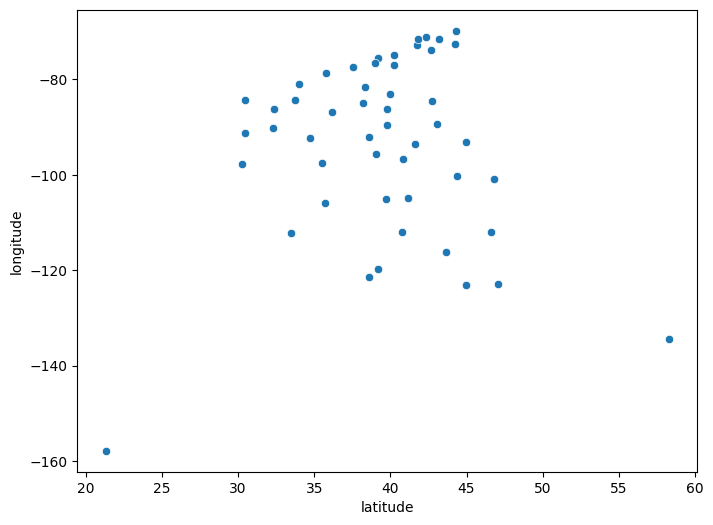

In [18]:
fig = plt.figure(figsize = (8,6))
sns.scatterplot(data = df,
           x = "latitude",
           y = "longitude")
plt.show()

In [21]:
X = iris.data[["petal width (cm)"]].values
y = iris.target_names[iris.target]== "virginica"

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 42)

In [25]:
log_reg = LogisticRegression(random_state = 42)
log_reg.fit(X_train,y_train)

LogisticRegression(random_state=42)

In [27]:
X_new = np.linspace(0,3,1000).reshape(-1,1)

In [29]:
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:,1] >= 0.5][0,0]

In [30]:
decision_boundary

1.6516516516516517

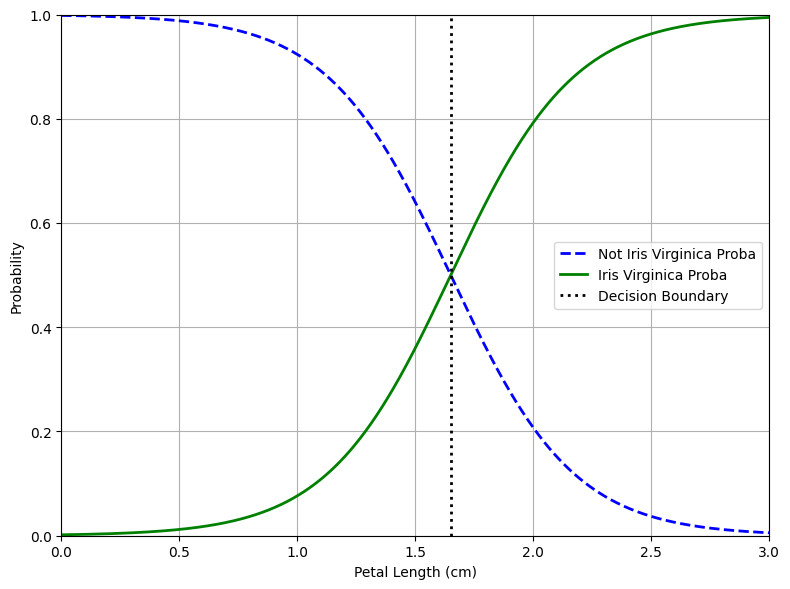

In [34]:
fig = plt.figure(figsize = (8,6))
plt.plot(X_new,y_proba[:,0], "b--",linewidth = 2,
        label = "Not Iris Virginica Proba")
plt.plot(X_new,y_proba[:,1],"g-",linewidth = 2,label = "Iris Virginica Proba")
plt.plot([decision_boundary,decision_boundary],[0,1],"k:",linewidth = 2, label = "Decision Boundary")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Probability")
plt.legend()
plt.ylim(0,1)
plt.xlim(0,3)
plt.grid()
plt.tight_layout()
plt.show()